In [7]:
import pandas as pd
wine = pd.read_csv('https://raw.githubusercontent.com/rickiepark/hg-mldl/master/wine.csv')

In [10]:
# class가 0이면 red, 1이면 white
# 이진 분류 문제고, white wine이 양성 클래스에 해당한다.
# 훈련 세트의 평균값으로 테스트 세트의 누락된 값을 채워야 한다.
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [19]:
data = wine.drop('class', axis=1)
# 명시적인 것이 암시적인 것보다 낫다. 그렇기 때문에 반드시 axis=1 로 방향을 정해주자.
target = wine['class']

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [23]:
from sklearn.linear_model import LogisticRegression
print(train_input.shape, train_target.shape)

(4872, 3) (4872,)


In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
# 사실 결정 트리에서 이 과정은 필요가 없다! 오히려 결과 확인할 때 표준화된 값이라 해석하기가 어려워질 뿐이다.
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)
lr = LogisticRegression()
lr.fit(train_scaled, train_target)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [27]:
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7859195402298851
0.7655384615384615


In [29]:
print(lr.coef_, lr.intercept_)

[[ 0.53272315  1.67940138 -0.70910354]] [1.84709816]


In [38]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))


0.8499589490968801
0.8363076923076923


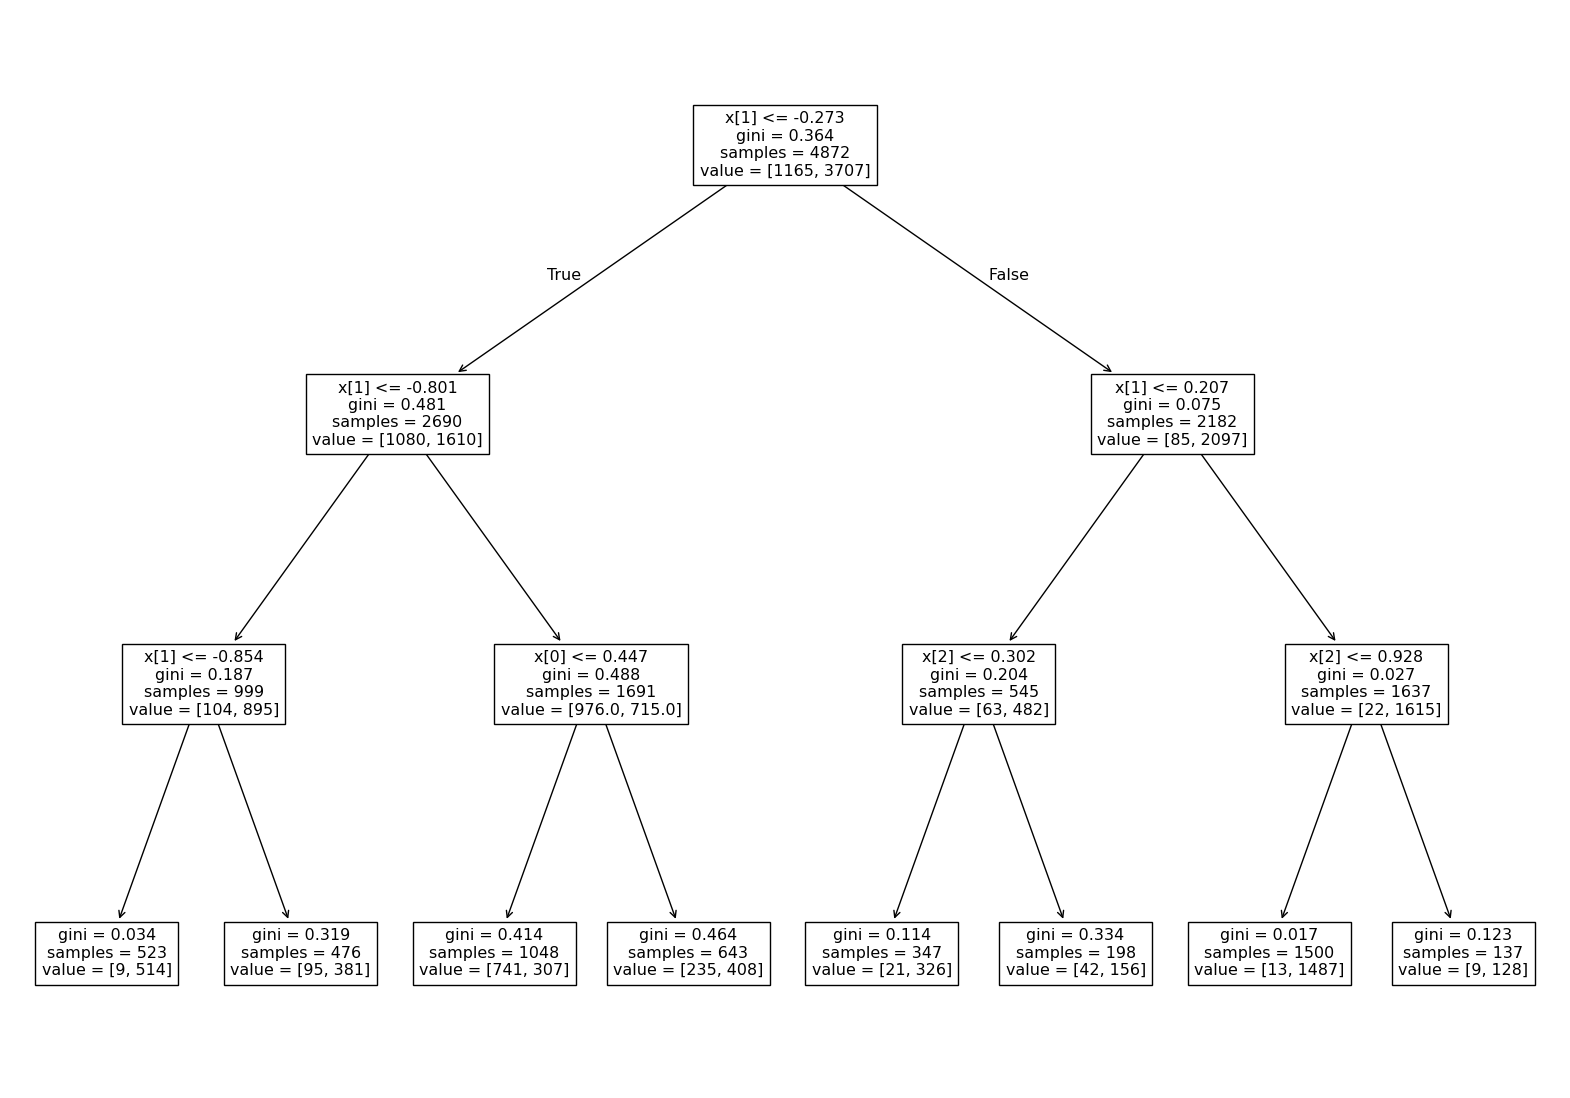

In [39]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(20,14))
plot_tree(dt)
plt.show()

0.8975779967159278
0.8590769230769231


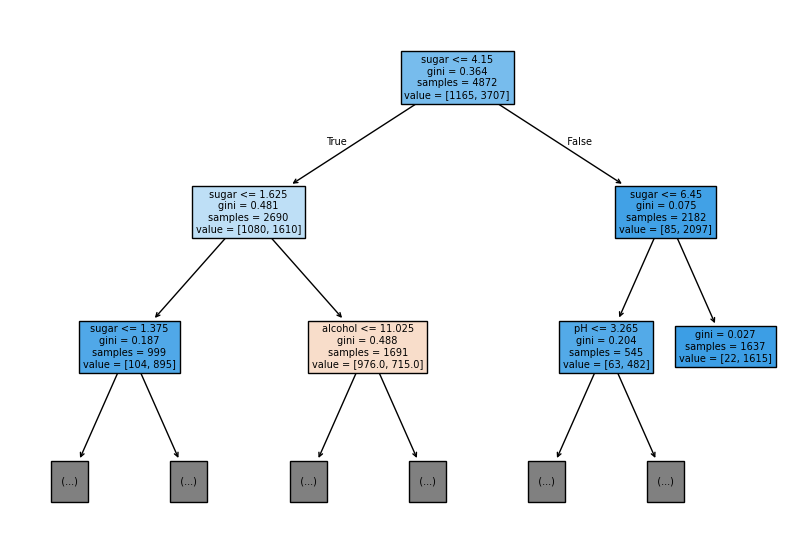

In [41]:
dt = DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))
plt.figure(figsize=(10, 7))
plot_tree(dt, max_depth=2, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()